## Drop columns that have a low correlation with the target variable

### 1. Calculate the correlation of each feature with the target variable

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_excel("Dots Glasses Potential Customer Survey Data.xlsx")

# Compute correlation with "Wear Specs"
corr_matrix = df.corr(numeric_only=True)
target_corr = corr_matrix["Wear Specs"].sort_values(ascending=False)
print("Feature correlation with 'Wear Specs':\n", target_corr)


Feature correlation with 'Wear Specs':
 Wear Specs                                                 1.000000
Time spent watching videos/TV                              0.342571
Age                                                        0.221421
Drinks alcohol                                             0.205002
Whether parents have specs                                 0.190556
Total Time spent working in front of screen                0.139726
Has Diabetes                                               0.126125
Wants to change career                                     0.115028
IQ                                                         0.094830
Annual Family Income ($)                                   0.089451
Maritial Status (0 - Single, 1 - Married, 2 - Divorced)    0.083085
Smoker                                                     0.063791
Has debt                                                   0.059074
Time spent playing indoor sports                           0.048289
Migrated

### 2. Drop columns with low correlation

In [2]:
# Define threshold (e.g., 0.2)
threshold = 0.2
high_corr_features = target_corr[abs(target_corr) >= threshold].index

# Create filtered dataset
filtered_df = df[high_corr_features]
print("Selected Features:\n", filtered_df.columns)

Selected Features:
 Index(['Wear Specs', 'Time spent watching videos/TV', 'Age', 'Drinks alcohol'], dtype='object')


### 3. Identify cut-off points where 70% or more people wear specs

In [3]:
# Check proportion of people wearing specs across numeric features
for feature in filtered_df.select_dtypes(include=['number']).columns:
    if feature != "Wear Specs":
        bins = pd.cut(filtered_df[feature], bins=10)  # Creating bins
        specs_ratio = filtered_df.groupby(bins)["Wear Specs"].mean()
        
        cutoff = specs_ratio[specs_ratio >= 0.7]
        if not cutoff.empty:
            print(f"Feature '{feature}' has a cutoff range where 70%+ wear specs:\n", cutoff)

Feature 'Time spent watching videos/TV' has a cutoff range where 70%+ wear specs:
 Time spent watching videos/TV
(6.0, 7.0]     0.704762
(7.0, 8.0]     0.772093
(8.0, 9.0]     0.794521
(9.0, 10.0]    0.866142
Name: Wear Specs, dtype: float64
Feature 'Age' has a cutoff range where 70%+ wear specs:
 Age
(67.6, 75.4]    0.708633
(75.4, 83.2]    0.767296
(83.2, 91.0]    0.805556
Name: Wear Specs, dtype: float64


### 4. Analyze binary columns to see if one group has higher chances of wearing specs

In [4]:
binary_cols = [col for col in filtered_df.columns if df[col].nunique() == 2]

for col in binary_cols:
    specs_ratio = filtered_df.groupby(col)["Wear Specs"].mean()
    print(f"Specs ratio for '{col}':\n", specs_ratio)

Specs ratio for 'Wear Specs':
 Wear Specs
0    0.0
1    1.0
Name: Wear Specs, dtype: float64
Specs ratio for 'Drinks alcohol':
 Drinks alcohol
0    0.421468
1    0.630312
Name: Wear Specs, dtype: float64


### 5. Visualize correlations using a heatmap

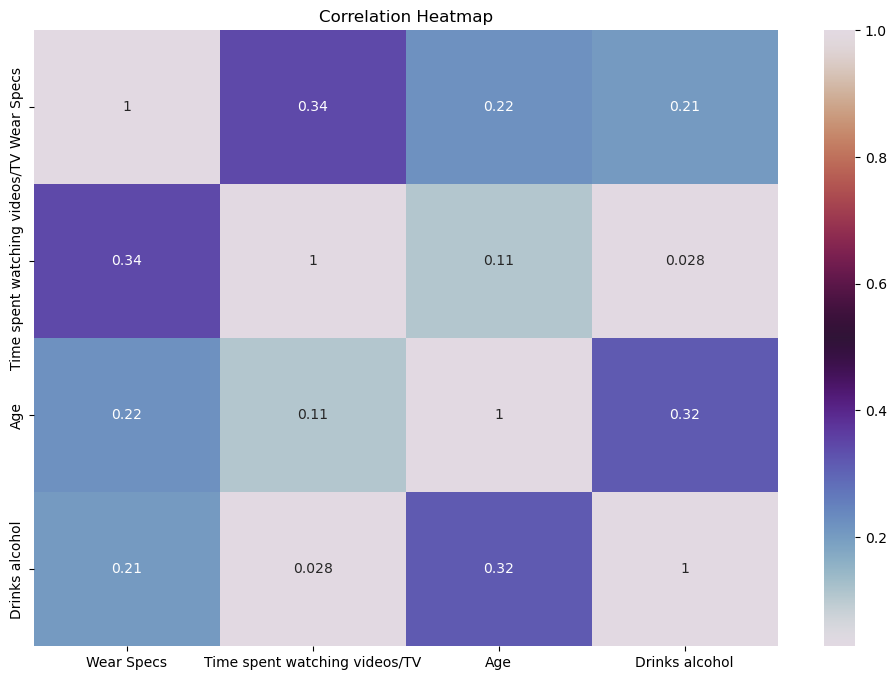

In [11]:
plt.figure(figsize=(12, 8))
sns.heatmap(filtered_df.corr(numeric_only=True), annot=True, cmap="twilight")
plt.title("Correlation Heatmap")
plt.show()